# Quantum Fourier Transform
## Franziska Brändle, Luan Wei, Turan Orujlu, Tim Brockmeyer
### Universität Osnabrück (Oct. 2018)

For our Quantum Fourier Transform implementation we use Hadamard gates and Control Unit Gates (here Cu1) to realize the phase shift. As we use 6 qbits, we have phase shifts up to R64.
An input with pure states corresponds to a column vector with one "1" and sixty-three "0"s. Multiplying this input vector with the QFT Matrix picks out just one column of the QFT Matrix. Since the matrix has only non-zero entries the resulting vector also consists of non-zero entries, which means that the output is a superposed state, and we get a probability distribution with no discernible peak. In order to avoid this situation we have to manipulate the input, i.e., the input has to be in a superposed, a.k.a. non-pure state. To achieve that goal we use Pauli matrices to rotate the Bloch sphere of every qbit of the input around the x-axis. The goal is to achieve an input vector which after multiplication with the QFT Matrix, results in an output vector that has mostly "0" entries, meaning that the elements of the input vector scale and cancel the elements of each row vector of the QFT Matrix.

In [27]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import Aer
from qiskit.tools.visualization import circuit_drawer
import matplotlib.pyplot as plt

q = QuantumRegister(6)
c = ClassicalRegister(6)
qc = QuantumCircuit(q, c)

In [28]:
#Rotating Bloch Sphere using Pauli matrices
qc.rx((np.pi/24),q[0])
qc.rx(-(np.pi/20),q[1])
qc.rx((np.pi/16),q[2])
qc.rx(-(np.pi/12),q[3])
qc.rx((np.pi/8),q[4])
qc.rx(-(np.pi/4),q[5])


In [29]:
for i, qubit1 in enumerate(q):
    #Hadamard gate
    qc.h(qubit1)
    p = 2 #exponent 
    for j, qubit2 in enumerate(q):
        #Add control gate to remaining qubit
        if j > i:
            qc.cu1((2/2**(p))*np.pi, qubit2, qubit1)
            p += 1
qc.measure(q,c)

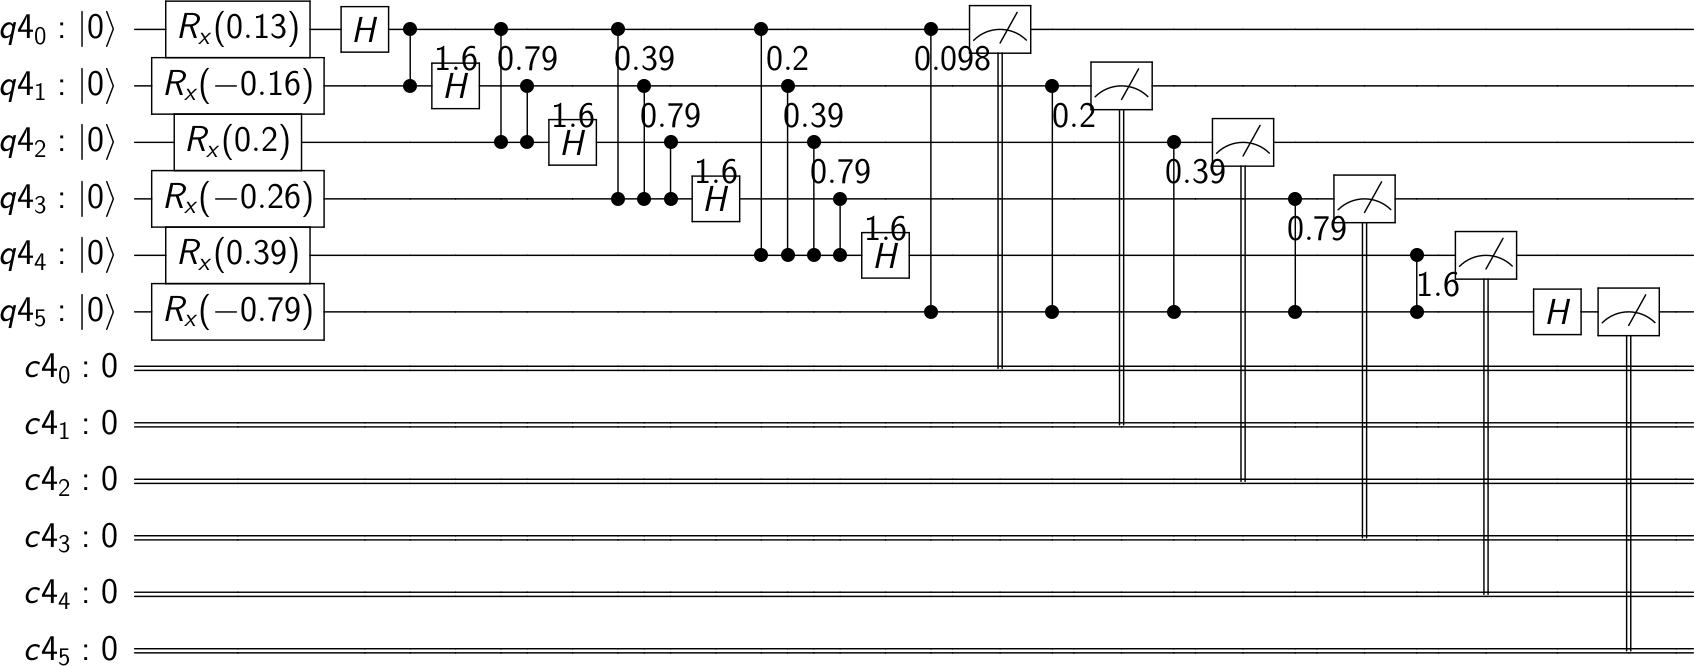

In [30]:
circuit_drawer(qc)


In [31]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=10000)
result = job.result().get_counts(qc)


Plotting

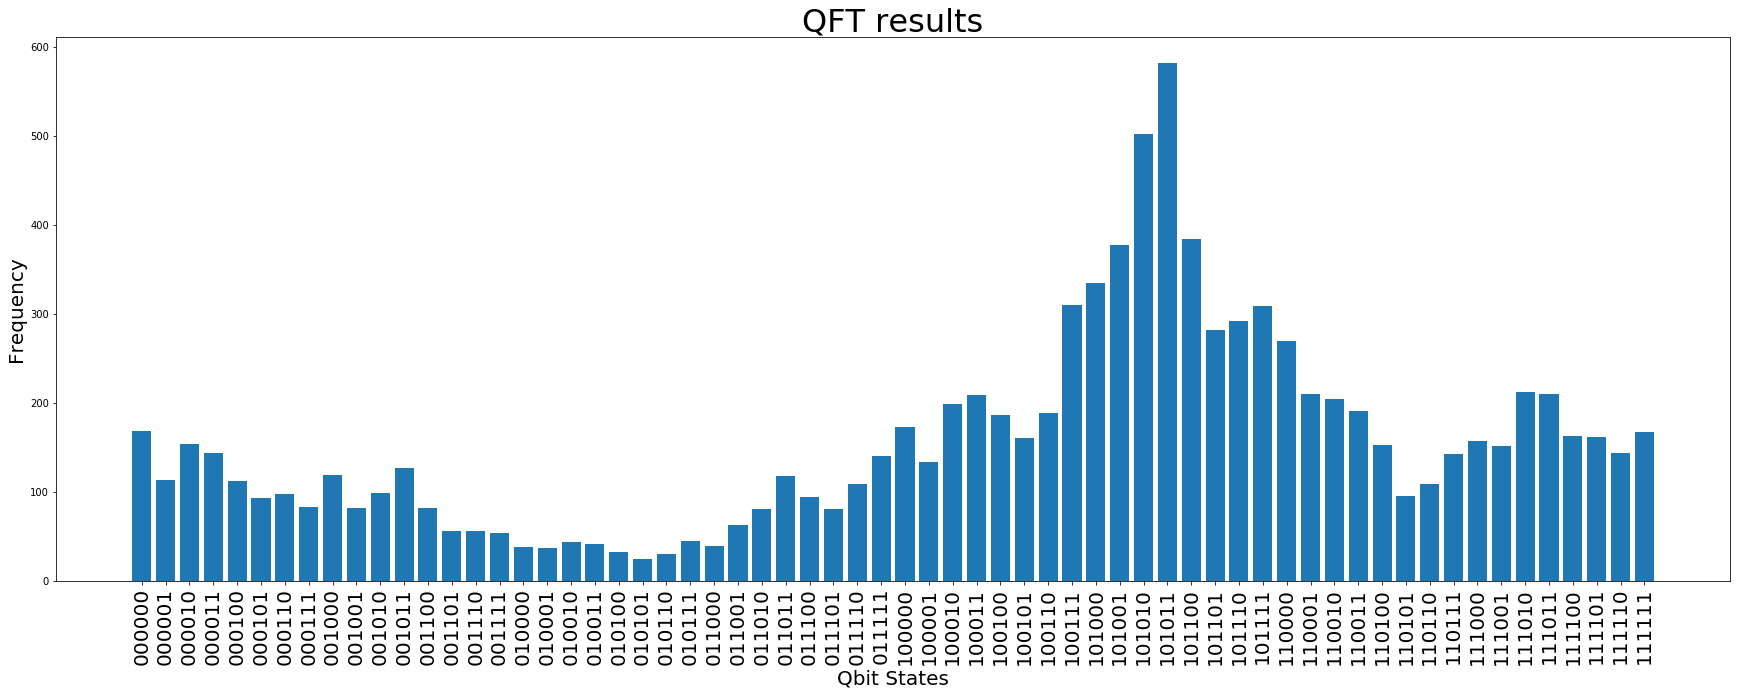

In [32]:
%matplotlib inline
x,y = np.transpose(list(result.items()))
y = [int(i) for i in y]
fig, ax = plt.subplots(figsize=(30, 10))
plt.title("QFT results")
plt.bar(x,y)
plt.xlabel("Qbit States")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.rc('axes', titlesize=32)
plt.rc('xtick', labelsize=20) 
plt.rc('axes', labelsize=20)